# Introduction

## Background
The dataset consists of many different types of macromolecules of biological signifiance. The majority of the data records are of proteins. With DNA being the precursor to RNA, which when translated, proteins are the biomolecules that are directly interacting in biological pathways and cycles. Proteins are usually centered around one or a few job which is defined by their family type. For example, we can have a protein that is from a Hydrolase group, which focuses on catalyzing hydrolysis (breaking bonds by adding water) in order to help promote destruction of chains of proteins, or other molecules. Another example would be a protein that is a transport protein, which allows other molecules such as sucrose, fructose, or even water come in and outside of the cell.

## Goals
With these proteins having different family types, a question arises if it's possible to determine a protein's family type based on sequence. There are notable search engines such as BLAST which has this capability, but it'd be interesting to see if a deep learning approach can do a good job in classifying a protein's family based on the protein sequence.

### 1). Import Dataset
* Data source/kernel (from PDB): https://www.kaggle.com/shahir/protein-data-set

# Data Preprocessing
**Data Exploration:** The shape, head(), and describe() methods are used to understand the data's structure and statistics. Key features include structureId, classification, residueCount, resolution, structureMolecularWeight, crystallizationTempK, densityMatthews, densityPercentSol, phValue, and sequence.

**Missing Value Handling:** The dataset contains missing values. The author chooses to drop rows with any missing values using dropna() due to the relatively large dataset size, resulting in a working dataset of 214,106 proteins.

**Classification Distribution Analysis:** The distribution of protein families within the 'classification' column is examined using value_counts() and visualized with a distribution plot. A wide range of counts per family type is observed.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


# Import Dataset
dataset = pd.read_csv('/content/model_f (1).csv')

print('Dataset has been loaded...')

Dataset has been loaded...


In [ ]:
dataset.shape

(346325, 10)

In [ ]:
dataset.head()

,structureId,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence
0,101M,OXYGEN TRANSPORT,154,2.07,18112.80,NaN,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
1,102L,HYDROLASE(O-GLYCOSYL),165,1.74,18926.61,NaN,2.75,55.28,NaN,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
2,102M,OXYGEN TRANSPORT,154,1.84,18010.64,NaN,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
3,103L,HYDROLASE(O-GLYCOSYL),167,1.90,19092.72,NaN,2.70,54.46,NaN,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
4,103M,OXYGEN TRANSPORT,154,2.07,18093.78,NaN,3.09,60.30,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [ ]:
dataset.describe(include="all")

,structureId,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence
count,346325,346324,346325.000000,330232.000000,3.463250e+05,243934.000000,307481.000000,307615.000000,259130.000000,346322
unique,127387,4468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89083
top,3J3Q,HYDROLASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PIVQNLQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEG...
freq,1356,46336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2580
mean,NaN,NaN,4708.536765,2.716206,5.516918e+05,291.243141,2.760855,52.817512,6.801273,NaN
std,NaN,NaN,26484.160063,3.083736,3.129940e+06,8.498793,0.738698,10.135556,1.344769,NaN
min,NaN,NaN,3.000000,0.480000,4.535500e+02,4.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,398.000000,1.900000,4.541398e+04,291.000000,2.280000,45.820000,6.000000,NaN
50%,NaN,NaN,856.000000,2.300000,9.703276e+04,293.000000,2.570000,52.000000,7.000000,NaN
75%,NaN,NaN,1976.000000,2.800000,2.253119e+05,295.000000,3.030000,59.380000,7.500000,NaN


In [ ]:
dataset.columns


Index(['structureId', 'classification', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationTempK', 'densityMatthews',
       'densityPercentSol', 'phValue', 'sequence'],
      dtype='object')

In [ ]:
print('%d is the number of rows in the dataset' %dataset.shape[0])

346325 is the number of rows in the dataset


In [ ]:
# Check NA counts
dataset.isnull().sum()

,0
structureId,0
classification,1
residueCount,0
resolution,16093
structureMolecularWeight,0
crystallizationTempK,102391
densityMatthews,38844
densityPercentSol,38710
phValue,87195
sequence,3


With 346,325 proteins, it appears that simply removing missing values is acceptable.

In [ ]:
# Drop rows with missing values
model_f = dataset.dropna()
print('%d is the number of proteins that have a classification and sequence' %model_f.shape[0])

214106 is the number of proteins that have a classification and sequence


Lastly, it's important to look at the types of family groups that clasification can be.

classification
HYDROLASE                               29726
TRANSFERASE                             24338
OXIDOREDUCTASE                          22578
IMMUNE SYSTEM                           11087
HYDROLASE/HYDROLASE INHIBITOR            9569
                                        ...  
DYE-BINDING PROTEIN                         1
CHAPERONE REGULATOR                         1
pyridoxal phosphate binding                 1
IMMUNE SYSTEM, LIPID BINDING PROTEIN        1
lipid transport/activator                   1
Name: count, Length: 2458, dtype: int64


<ipython-input-9-08c8689f4c67>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(counts, hist = False, color = 'purple')


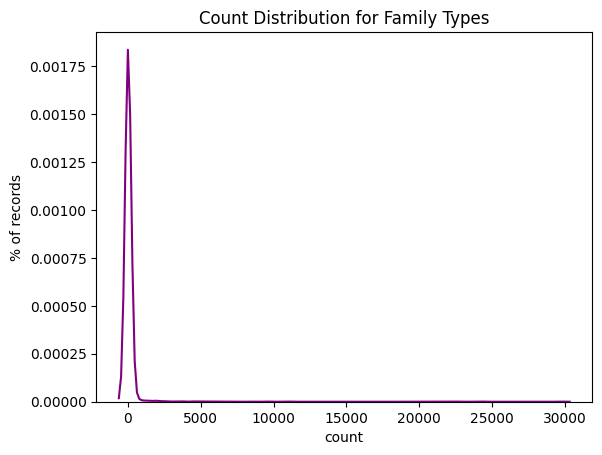

In [ ]:
# Look at classification type counts
counts = model_f.classification.value_counts()
print(counts)

#plot counts
plt.figure()
sns.distplot(counts, hist = False, color = 'purple')
plt.title('Count Distribution for Family Types')
plt.ylabel('% of records')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


There appears to be a wide distribution of counts for family types.

# **Models to be Evaluated**
**LSTM (Long Short-Term Memory):** An RNN architecture designed for sequential data. The model uses an embedding layer, followed by an LSTM layer, GlobalMaxPooling1D, dropout layers for regularization, and dense layers. The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss. Accuracy is the evaluation metric.

**RNN (Recurrent Neural Network):** A simpler recurrent architecture compared to LSTM. The model structure is similar to the LSTM model, replacing the LSTM layer with a SimpleRNN layer.

**CNN (Convolutional Neural Network):** A model designed for grid-like data but also applicable to sequences. The model uses an embedding layer followed by a 1D convolutional layer, GlobalMaxPooling1D, dropout, and dense layers.

* For each model, the following steps are taken:



**Tokenization and Padding:** The protein sequences are tokenized and padded to a fixed length using the Tokenizer and pad_sequences functions from Keras.

**Data Splitting:** The data is split into training and testing sets using train_test_split from scikit-learn, with 80:20 and 70:30 splits explored.

**Model Compilation and Training:** Models are compiled using the Adam optimizer and sparse categorical cross-entropy loss. Training is performed for 10 epochs.

**Evaluation and Plotting:** Model performance is evaluated on the test set using evaluate(). Accuracy and loss curves are plotted for both training and validation sets to visualize the training progress.



# **1.LSTM**

*   Split : 80:20





In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Conv1D, MaxPooling1D # Import Conv1D and MaxPooling1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 84s 15ms/step - accuracy: 0.1306 - loss: 4.3532 - val_accuracy: 0.2489 - val_loss: 3.5247
Epoch 2/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 140s 15ms/step - accuracy: 0.2418 - loss: 3.4902 - val_accuracy: 0.3603 - val_loss: 3.0930
Epoch 3/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 83s 15ms/step - accuracy: 0.3365 - loss: 3.1375 - val_accuracy: 0.4321 - val_loss: 2.8549
Epoch 4/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 85s 16ms/step - accuracy: 0.3869 - loss: 2.9193 - val_accuracy: 0.4657 - val_loss: 2.7116
Epoch 5/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 137s 15ms/step - accuracy: 0.4152 - loss: 2.7808 - val_accuracy: 0.5011 - val_loss: 2.6152
Epoch 6/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - accuracy: 0.4430 - loss: 2.6524 - val_accuracy: 0.5248 - val_loss: 2.5172
Epoch 7/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - accuracy: 0.4647 - loss: 2.5525 - val_accuracy: 0.5390 - val_loss: 2.4623
Epoch 8/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 81s 15ms/step - accuracy: 0.4756

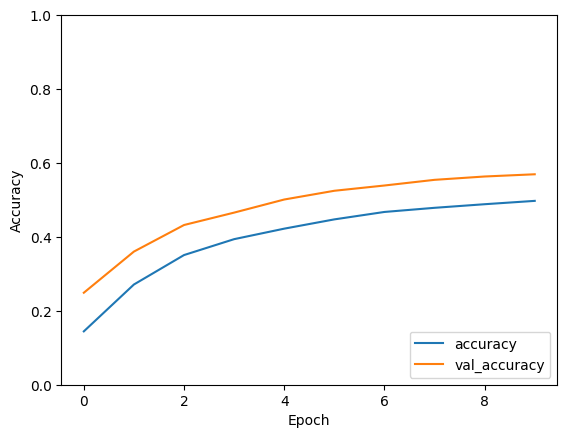

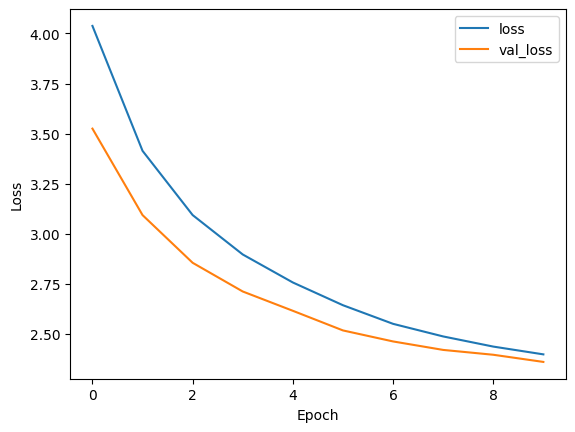

In [ ]:
MAX_VOCAB_SIZE = 20000  # Maximum number of words to keep
MAX_SEQUENCE_LENGTH = 200  # Maximum sequence length
EMBEDDING_DIM = 128  # Embedding dimension

# Prepare data: Tokenize and pad sequences
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(model_f['sequence'])
sequences = tokenizer.texts_to_sequences(model_f['sequence'])
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y = model_f['classification'].astype('category').cat.codes  # Convert labels to integer codes

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
lstm_model = Sequential([
    Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(64, return_sequences=True),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y.nunique(), activation='softmax')  # Adjust output units to match the number of classes
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train LSTM model
history = lstm_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
lstm_model.evaluate(X_test, y_test)

# Plot accuracy and loss curves using the history object
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

*   Split : 70:30

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4684/4684 ━━━━━━━━━━━━━━━━━━━━ 70s 15ms/step - accuracy: 0.1309 - loss: 4.3752 - val_accuracy: 0.2029 - val_loss: 3.6647
Epoch 2/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 69s 15ms/step - accuracy: 0.2212 - loss: 3.5825 - val_accuracy: 0.3380 - val_loss: 3.2242
Epoch 3/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 84s 15ms/step - accuracy: 0.3239 - loss: 3.2188 - val_accuracy: 0.3937 - val_loss: 3.0353
Epoch 4/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 79s 14ms/step - accuracy: 0.3630 - loss: 3.0408 - val_accuracy: 0.4302 - val_loss: 2.9058
Epoch 5/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.3929 - loss: 2.8903 - val_accuracy: 0.4636 - val_loss: 2.7928
Epoch 6/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.4099 - loss: 2.8012 - val_accuracy: 0.4748 - val_loss: 2.7119
Epoch 7/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.4287 - loss: 2.6974 - val_accuracy: 0.5006 - val_loss: 2.6075
Epoch 8/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.4522 - loss: 2.61

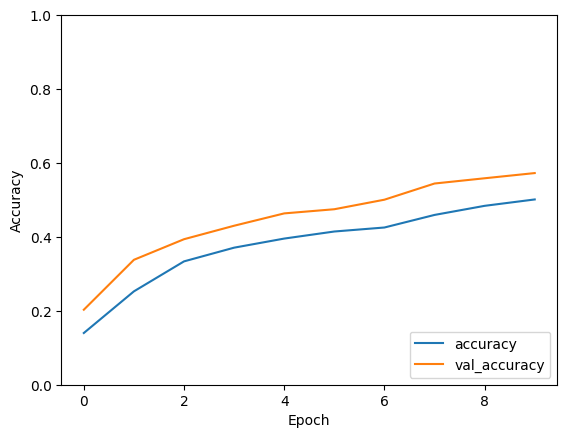

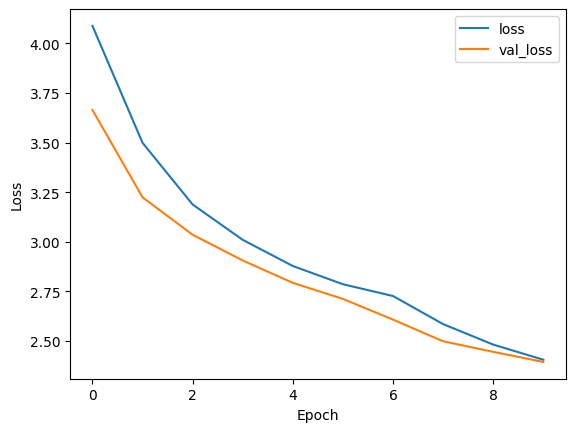

In [ ]:
MAX_VOCAB_SIZE = 20000  # Maximum number of words to keep
MAX_SEQUENCE_LENGTH = 200  # Maximum sequence length
EMBEDDING_DIM = 128  # Embedding dimension

# Prepare data: Tokenize and pad sequences
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(model_f['sequence'])
sequences = tokenizer.texts_to_sequences(model_f['sequence'])
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y = model_f['classification'].astype('category').cat.codes  # Convert labels to integer codes

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define LSTM model
lstm_model = Sequential([
    Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(64, return_sequences=True),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y.nunique(), activation='softmax')  # Adjust output units to match the number of classes
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train LSTM model
history = lstm_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
lstm_model.evaluate(X_test, y_test)

# Plot accuracy and loss curves using the history object
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# **RNN**

*   Split : 80:20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 135s 25ms/step - accuracy: 0.1369 - loss: 4.3424 - val_accuracy: 0.3281 - val_loss: 3.2302
Epoch 2/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 136s 24ms/step - accuracy: 0.3461 - loss: 3.1811 - val_accuracy: 0.4872 - val_loss: 2.6310
Epoch 3/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 140s 23ms/step - accuracy: 0.4439 - loss: 2.7316 - val_accuracy: 0.5370 - val_loss: 2.4145
Epoch 4/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 142s 23ms/step - accuracy: 0.4805 - loss: 2.5658 - val_accuracy: 0.5680 - val_loss: 2.2912
Epoch 5/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 142s 24ms/step - accuracy: 0.5057 - loss: 2.4312 - val_accuracy: 0.5852 - val_loss: 2.2184
Epoch 6/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 142s 24ms/step - accuracy: 0.5182 - loss: 2.3764 - val_accuracy: 0.5968 - val_loss: 2.1803
Epoch 7/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 143s 24ms/step - accuracy: 0.5237 - loss: 2.3228 - val_accuracy: 0.6029 - val_loss: 2.1628
Epoch 8/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 126s 24ms/step - accuracy: 

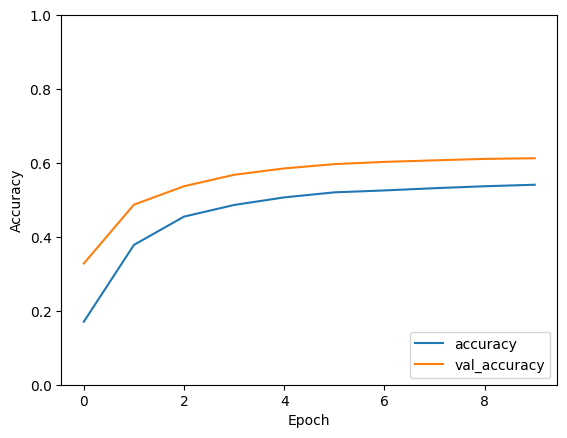

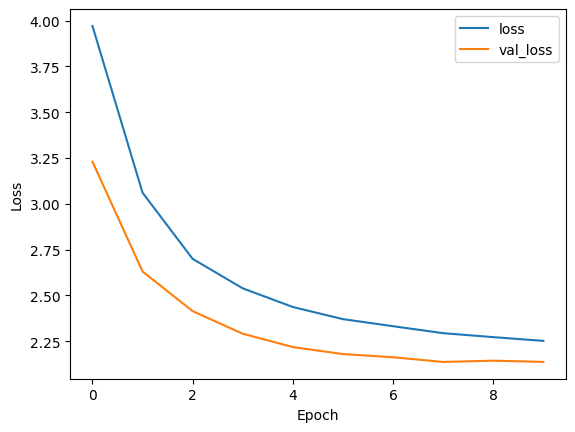

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GlobalMaxPooling1D, Dropout, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Hyperparameters
MAX_VOCAB_SIZE = 20000  # Maximum number of words to keep
MAX_SEQUENCE_LENGTH = 200  # Maximum sequence length
EMBEDDING_DIM = 128  # Embedding dimension

# Prepare data: Tokenize and pad sequences
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(model_f['sequence'])
sequences = tokenizer.texts_to_sequences(model_f['sequence'])
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y = model_f['classification'].astype('category').cat.codes  # Convert labels to integer codes

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define RNN model
rnn_model = Sequential([
    Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    SimpleRNN(64, return_sequences=True),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y.nunique(), activation='softmax')  # Adjust output units to match the number of classes
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train RNN model
history = rnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
rnn_model.evaluate(X_test, y_test)

# Plot accuracy and loss curves using the history object
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


*   Split : 70:30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 128s 26ms/step - accuracy: 0.1288 - loss: 4.3993 - val_accuracy: 0.2279 - val_loss: 3.6113
Epoch 2/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 135s 25ms/step - accuracy: 0.2398 - loss: 3.5035 - val_accuracy: 0.3954 - val_loss: 2.9837
Epoch 3/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 143s 26ms/step - accuracy: 0.3753 - loss: 2.9830 - val_accuracy: 0.4837 - val_loss: 2.6389
Epoch 4/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 143s 26ms/step - accuracy: 0.4460 - loss: 2.6855 - val_accuracy: 0.5376 - val_loss: 2.4566
Epoch 5/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 139s 25ms/step - accuracy: 0.4778 - loss: 2.5296 - val_accuracy: 0.5593 - val_loss: 2.3833
Epoch 6/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 142s 25ms/step - accuracy: 0.4970 - loss: 2.4453 - val_accuracy: 0.5767 - val_loss: 2.3250
Epoch 7/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 145s 26ms/step - accuracy: 0.5075 - loss: 2.3859 - val_accuracy: 0.5892 - val_loss: 2.2845
Epoch 8/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 138s 25ms/step - accuracy: 

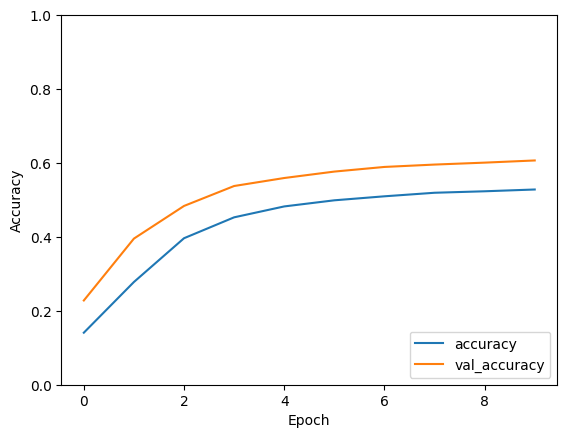

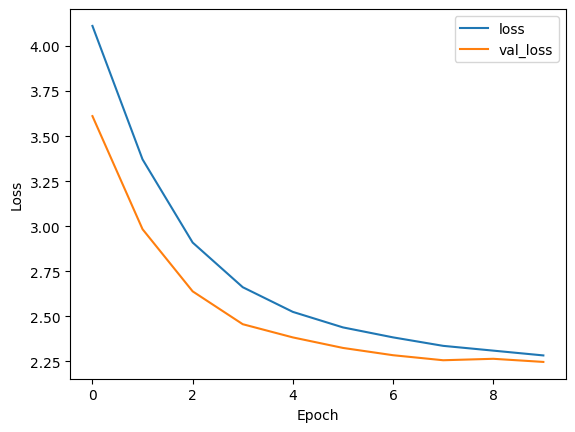

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GlobalMaxPooling1D, Dropout, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Hyperparameters
MAX_VOCAB_SIZE = 20000  # Maximum number of words to keep
MAX_SEQUENCE_LENGTH = 200  # Maximum sequence length
EMBEDDING_DIM = 128  # Embedding dimension

# Prepare data: Tokenize and pad sequences
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(model_f['sequence'])
sequences = tokenizer.texts_to_sequences(model_f['sequence'])
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y = model_f['classification'].astype('category').cat.codes  # Convert labels to integer codes

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define RNN model
rnn_model = Sequential([
    Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    SimpleRNN(64, return_sequences=True),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y.nunique(), activation='softmax')  # Adjust output units to match the number of classes
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train RNN model
history = rnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
rnn_model.evaluate(X_test, y_test)

# Plot accuracy and loss curves using the history object
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


# **CNN**

*   Split : 80:20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.1591 - loss: 4.2445 - val_accuracy: 0.3420 - val_loss: 3.1862
Epoch 2/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.3515 - loss: 3.1345 - val_accuracy: 0.4872 - val_loss: 2.6084
Epoch 3/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.4521 - loss: 2.6483 - val_accuracy: 0.5486 - val_loss: 2.3688
Epoch 4/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.4952 - loss: 2.4408 - val_accuracy: 0.5758 - val_loss: 2.2626
Epoch 5/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.5187 - loss: 2.3310 - val_accuracy: 0.5867 - val_loss: 2.2217
Epoch 6/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.5291 - loss: 2.2592 - val_accuracy: 0.5937 - val_loss: 2.2075
Epoch 7/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.5366 - loss: 2.2162 - val_accuracy: 0.6020 - val_loss: 2.1827
Epoch 8/10
5353/5353 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.5418 - loss: 2

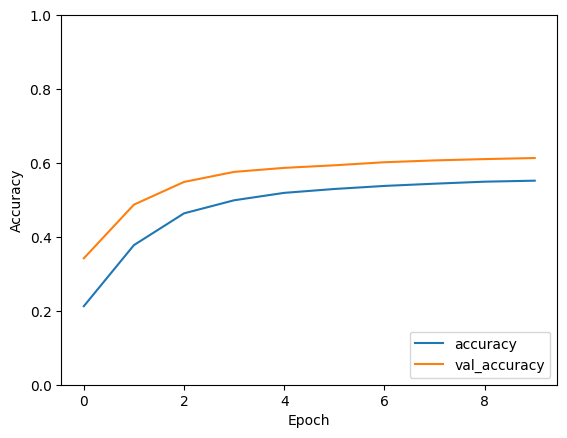

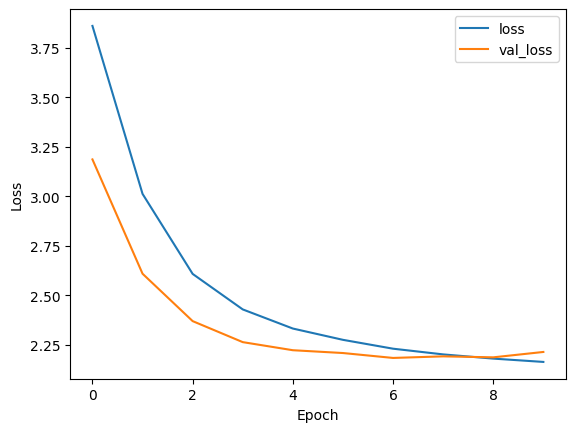

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Hyperparameters
MAX_VOCAB_SIZE = 20000  # Maximum number of words to keep
MAX_SEQUENCE_LENGTH = 200  # Maximum sequence length
EMBEDDING_DIM = 128  # Embedding dimension

# Prepare data: Tokenize and pad sequences
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(model_f['sequence'])
sequences = tokenizer.texts_to_sequences(model_f['sequence'])
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y = model_f['classification'].astype('category').cat.codes  # Convert labels to integer codes

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
cnn_model = Sequential([
    Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Conv1D(128, 5, activation='relu'),  # Convolutional layer with 128 filters and kernel size of 5
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y.nunique(), activation='softmax')  # Adjust output units to match the number of classes
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train CNN model
history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
cnn_model.evaluate(X_test, y_test)

# Plot accuracy and loss curves using the history object
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


*   Split : 70:30


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4684/4684 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.1468 - loss: 4.2876 - val_accuracy: 0.3204 - val_loss: 3.3357
Epoch 2/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.3384 - loss: 3.2129 - val_accuracy: 0.4610 - val_loss: 2.7368
Epoch 3/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.4389 - loss: 2.7193 - val_accuracy: 0.5361 - val_loss: 2.4684
Epoch 4/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.4913 - loss: 2.4697 - val_accuracy: 0.5709 - val_loss: 2.3414
Epoch 5/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.5157 - loss: 2.3428 - val_accuracy: 0.5891 - val_loss: 2.2872
Epoch 6/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.5318 - loss: 2.2750 - val_accuracy: 0.5982 - val_loss: 2.2687
Epoch 7/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.5402 - loss: 2.2349 - val_accuracy: 0.6024 - val_loss: 2.2717
Epoch 8/10
4684/4684 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.5461 - loss: 2.1858 - val

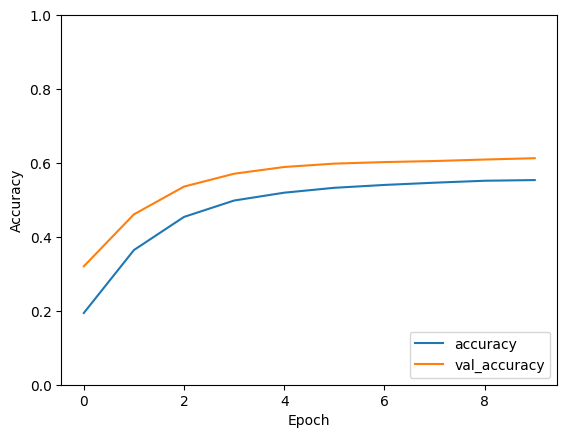

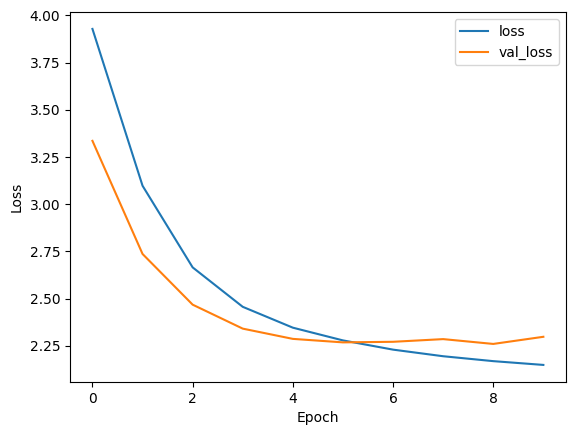

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Hyperparameters
MAX_VOCAB_SIZE = 20000  # Maximum number of words to keep
MAX_SEQUENCE_LENGTH = 200  # Maximum sequence length
EMBEDDING_DIM = 128  # Embedding dimension

# Prepare data: Tokenize and pad sequences
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(model_f['sequence'])
sequences = tokenizer.texts_to_sequences(model_f['sequence'])
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y = model_f['classification'].astype('category').cat.codes  # Convert labels to integer codes

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define CNN model
cnn_model = Sequential([
    Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Conv1D(128, 5, activation='relu'),  # Convolutional layer with 128 filters and kernel size of 5
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y.nunique(), activation='softmax')  # Adjust output units to match the number of classes
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train CNN model
history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the model
cnn_model.evaluate(X_test, y_test)

# Plot accuracy and loss curves using the history object
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


# Observations

**Table of Accuracy and Loss:**

| Model | Split | Training Accuracy | Validation Accuracy | Training Loss | Validation Loss |
|---|---|---|---|---|---|
| LSTM | 80:20 | 0.4963 | 0.5694 | 2.3916 | 2.3600 |
| LSTM | 70:30 | 0.5732 | 0.5726 | 2.3786 | 2.3742  |
| RNN | 80:20 | 0.5422 | 0.6118 | 2.2433 | 2.1375 |
| RNN | 70:30 | 0.5283 | 0.6070 | 2.2777 | 2.2473|
| CNN | 80:20 | 0.5515 | 0.6146 | 2.1502 | 2.2129|
| CNN | 70:30 | 0.5526 | 0.6129 | 2.1497 | 2.2982|


**Observations from the Table and Graphs:**

* **LSTM:** Shows decent performance but appears to be slightly underperforming compared to RNN and CNN, especially given its more complex architecture. The 70:30 split has a very similar training and validation accuracy, potentially hinting at better generalization.
* **RNN:** Achieves the highest validation accuracy in the 80:20 split.
* **CNN:**  Has competitive performance and tends to train faster than RNN and LSTM due to fewer sequential computations.  There seems to be a trade-off, however: the training accuracy does not increase by much for CNN and the validation loss shows greater volatility and potentially overfitting.

The different splits do not show drastic changes in overall performance, suggesting a reasonable amount of data for training.

### Reasons for Model Error
Proteins in general can be a type of enzyme, or a signaling protein, structural, and various other choices. A lot of proteins tend to share very similar characteristics, as some proteins are meant to bind in similar regions as others. For example, a Hydrolase enzyme and a Hydrolase inhibitor protein are going to have similar structures as they will target very similar areas. Gene regulator proteins will have a similarity to RNA binding proteins, DNA binding proteins, as well as transcription proteins.The possibility of utilizing amino acids of higher degree in theory should be able to create an even higher accuracy.
